In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

Cargo los archivos

In [2]:
cambiomano = pd.read_csv(r'C:\Users\Mateio\Desktop\tiempos_cambio_mano.csv')
cambiomano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36472 entries, 0 to 36471
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tiempo_id      36472 non-null  int64
 1   usuario        36472 non-null  int64
 2   practica       36472 non-null  int64
 3   mano           36472 non-null  int64
 4   mano_anterior  36472 non-null  int64
 5   tiempo         36472 non-null  int64
 6   modo           36472 non-null  int64
dtypes: int64(7)
memory usage: 1.9 MB


In [3]:
#Idea: Agregar como feature la cantidad de cambios de mano de la practica
cambiomano.groupby(by=['usuario','modo','practica'])['mano'].count().unstack().head(10)
#Cantidad de cambios de mano por usuario y por practica... es raro. Como que no hay mucho numero repetido, como lo calcula?

practica        1     2     3     4     5     6     7     8     9     10  \
usuario modo                                                               
1       1     71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0   
        2     77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0   
62      1     71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0   
        2     77.0  77.0  77.0  77.0  77.0  77.0   NaN   NaN   NaN   NaN   
64      1     71.0  71.0  81.0  81.0  81.0  71.0  71.0  71.0  71.0  71.0   
        2     77.0  77.0  77.0  86.0  86.0  86.0  86.0  86.0  86.0  86.0   
65      1     81.0  81.0  81.0  81.0  81.0  81.0  81.0  81.0  81.0  81.0   
        2     82.0  86.0  86.0  86.0  86.0  86.0  86.0  86.0  86.0  86.0   
66      1     81.0  81.0  81.0  81.0  81.0  81.0  81.0  81.0  81.0  81.0   
        2     86.0  86.0  86.0  86.0  86.0  86.0  86.0  86.0  86.0   NaN   

practica        11    12    13    14    15    16    17    18    19    20  \
usuario modo                                                               
1       1     71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0   
        2     77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0  77.0   
62      1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
        2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
64      1     71.0  71.0  71.0  71.0  71.0  71.0  71.0  81.0  81.0  81.0   
        2     86.0  86.0  86.0  86.0  86.0  86.0   NaN   NaN   NaN   NaN   
65      1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
        2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
66      1     81.0  81.0  81.0  81.0   NaN   NaN   NaN   NaN   NaN   NaN   
        2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

practica        21    22    23    24    25  ...    27    28    29    30    31  \
usuario modo                                ...                                 
1       1     71.0  71.0  71.0  71.0   NaN  ...   NaN   NaN   NaN   NaN   NaN   
        2     77.0  77.0  77.0  77.0   NaN  ...   NaN   NaN   NaN   NaN   NaN   
62      1      NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
        2      NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
64      1     81.0  81.0  81.0  81.0  81.0  ...  81.0  81.0  81.0  81.0  81.0   
        2      NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
65      1      NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
        2      NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
66      1      NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
        2      NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   

practica        32    33    34    35    36    37    38  39  40  41  42  43  \
usuario modo                                                                 
1       1      NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN   
        2      NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN   
62      1      NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN   
        2      NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN   
64      1     81.0  81.0  81.0  81.0  81.0  81.0  81.0 NaN NaN NaN NaN NaN   
        2      NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN   
65      1      NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN   
        2      NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN   
66      1      NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN   
        2      NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN   

practica      44  45  46  47  48  49  50  51  
usuario modo                                  
1       1    NaN NaN NaN NaN NaN NaN NaN NaN  
        2    NaN NaN NaN NaN NaN NaN NaN NaN  
62      1    NaN NaN NaN NaN NaN NaN NaN NaN  
        2    NaN NaN NaN NaN 

In [4]:
tpotecla = pd.read_csv(r'C:\Users\Mateio\Desktop\tiempos_por_tecla.csv')
tpotecla = tpotecla.rename(columns={'usuario': 'usuario_id'})
tpotecla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116919 entries, 0 to 116918
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   tiempo_id      116919 non-null  int64
 1   usuario_id     116919 non-null  int64
 2   practica       116919 non-null  int64
 3   tecla          116919 non-null  int64
 4   up             116919 non-null  int64
 5   down           116919 non-null  int64
 6   anterior       116919 non-null  int64
 7   anterior_down  116919 non-null  int64
 8   modo           116919 non-null  int64
dtypes: int64(9)
memory usage: 8.0 MB


In [5]:
usuarios = pd.read_csv(r'C:\Users\Mateio\Desktop\usuarios.csv')
usuarios.head()

,usuario_id,usuario,dni,app_codigo,app_codigo_generado,app_password,a9_password,a9_forzar_cambio,mail
0,1,GARAYZABAL Diego,23197417,280473.0,2161776,2984784.0,acb54dbea4db12d5a2172f5f9bd13d40,0,dgarayzabal@gmail.com
1,62,RICARDO PIÑA,17385722,0.0,4522440,NaN,e39619f1b9de010969d611274e7397d7,0,ricardo.pina@gmail.com
2,64,DIEGO OBREGóN,23196174,NaN,1985214,NaN,7b63ea9cfc19bd46dd44c646539468f8,0,diego.obregon.k@gmail.com
3,65,FEDERICO CORAGLIO,39173836,NaN,3429177,NaN,61d23a022e9a3777b015dea832fab2e3,0,fedecoraglio@hotmail.com
4,66,CéSAR LUIS GUZMáN,26904898,NaN,7148409,NaN,ce2425b3447159ba7aebcf496198ce77,0,cesarluisg@gmail.com


Dropeo lo que no sirve

In [6]:
df = pd.merge(usuarios, tpotecla, how='inner', on=['usuario_id'])
df = df.drop(['app_codigo', 'app_codigo_generado', 'app_password', 'a9_password','a9_forzar_cambio','mail'], axis=1)
df.head()

,usuario_id,usuario,dni,tiempo_id,practica,tecla,up,down,anterior,anterior_down,modo
0,1,GARAYZABAL Diego,23197417,1,1,69,43,0,0,0,1
1,1,GARAYZABAL Diego,23197417,2,1,83,237,157,69,0,1
2,1,GARAYZABAL Diego,23197417,3,1,84,458,330,83,157,1
3,1,GARAYZABAL Diego,23197417,4,1,65,571,426,84,330,1
4,1,GARAYZABAL Diego,23197417,5,1,32,650,572,65,426,1


In [7]:
pd.DataFrame(df.groupby(['usuario','modo'])['practica'].max().unstack().sort_values([1],ascending=False))
#Para chequear como viene la carga de largas y cortas

modo,1,2
usuario,,
AGUSTIN ROSSO,51,3
NAHUEL,43,38
LUIS GIANNASI,41,36
DIEGO OBREGóN,38,16
GARAYZABAL Diego,24,24
FEDERICO SPINELLI,22,12
CéSAR LUIS GUZMáN,14,9
FEDERICO CORAGLIO,10,10
RICARDO PIÑA,10,6


In [8]:
frase_larga = df[(df['usuario'] == 'MATEO COMBA') & (df['practica'] == 1) & (df['modo'] == 1)]['usuario'].values
frase_corta = df[(df['usuario'] == 'MATEO COMBA') & (df['practica'] == 1) & (df['modo'] == 2)]['usuario'].values
#Para chequear la cantidad de valores que tiene una frase larga y una corta
print('La frase larga tiene ' + str(len(frase_larga)))
print('La frase corta tiene ' + str(len(frase_corta)))

La frase larga tiene 251
La frase corta tiene 248


In [9]:
df['real'] = df['tecla'].map(chr)
df.head()
#Para agregar las letras ascii como dato

,usuario_id,usuario,dni,tiempo_id,practica,tecla,up,down,anterior,anterior_down,modo,real
0,1,GARAYZABAL Diego,23197417,1,1,69,43,0,0,0,1,E
1,1,GARAYZABAL Diego,23197417,2,1,83,237,157,69,0,1,S
2,1,GARAYZABAL Diego,23197417,3,1,84,458,330,83,157,1,T
3,1,GARAYZABAL Diego,23197417,4,1,65,571,426,84,330,1,A
4,1,GARAYZABAL Diego,23197417,5,1,32,650,572,65,426,1,


In [10]:
df['push'] = df['up'] - df['down']
df.head()

,usuario_id,usuario,dni,tiempo_id,practica,tecla,up,down,anterior,anterior_down,modo,real,push
0,1,GARAYZABAL Diego,23197417,1,1,69,43,0,0,0,1,E,43
1,1,GARAYZABAL Diego,23197417,2,1,83,237,157,69,0,1,S,80
2,1,GARAYZABAL Diego,23197417,3,1,84,458,330,83,157,1,T,128
3,1,GARAYZABAL Diego,23197417,4,1,65,571,426,84,330,1,A,145
4,1,GARAYZABAL Diego,23197417,5,1,32,650,572,65,426,1,,78


In [11]:
df['down1'] = df['down'].shift(periods=-1)  #Para calculo de delay

df['delay'] = df['down1'] - df['up']   #Calculo de delay
df.head()

,usuario_id,usuario,dni,tiempo_id,practica,tecla,up,down,anterior,anterior_down,modo,real,push,down1,delay
0,1,GARAYZABAL Diego,23197417,1,1,69,43,0,0,0,1,E,43,157.0,114.0
1,1,GARAYZABAL Diego,23197417,2,1,83,237,157,69,0,1,S,80,330.0,93.0
2,1,GARAYZABAL Diego,23197417,3,1,84,458,330,83,157,1,T,128,426.0,-32.0
3,1,GARAYZABAL Diego,23197417,4,1,65,571,426,84,330,1,A,145,572.0,1.0
4,1,GARAYZABAL Diego,23197417,5,1,32,650,572,65,426,1,,78,714.0,64.0


In [12]:
df['real1'] = df['real'].shift(periods=-1)  #Letra siguiente para formar el par
df.tail()
df['par'] = df['real'] + df['real1'] #Formo el par
df.head()

,usuario_id,usuario,dni,tiempo_id,practica,tecla,up,down,anterior,anterior_down,modo,real,push,down1,delay,real1,par
0,1,GARAYZABAL Diego,23197417,1,1,69,43,0,0,0,1,E,43,157.0,114.0,S,ES
1,1,GARAYZABAL Diego,23197417,2,1,83,237,157,69,0,1,S,80,330.0,93.0,T,ST
2,1,GARAYZABAL Diego,23197417,3,1,84,458,330,83,157,1,T,128,426.0,-32.0,A,TA
3,1,GARAYZABAL Diego,23197417,4,1,65,571,426,84,330,1,A,145,572.0,1.0,,A
4,1,GARAYZABAL Diego,23197417,5,1,32,650,572,65,426,1,,78,714.0,64.0,E,E


### Seleccionar con que tipo de frase voy a trabajar

In [13]:
tipo = 1

if tipo == 1:
    largo_frase = 252
if tipo == 2:
    largo_frase = 249
#Falta cambiar en limite para que ponga bien el ORDEN

Lo que sigue es para crear la columna orden, para todos las frases largas (modo 1), calcular la cantidad de caracteres: 251. en base a eso llenar de a 251 y volver a 1 para asi darle una identidad a todas las practicas (no voy a usar el caracter porque se repite y no es lo mismo segun la ubicacion que tenga en la frase. puede aportar informacion)

In [14]:
df_filtrado = df[df['modo']==tipo]
df.head()
df_filtrado.reset_index()

df_filtrado = df_filtrado.drop(['anterior_down','down1', 'real1'], axis=1)

df_filtrado.head(20)
#Cambio el numero si quiero analizar frases largas o cortas

,usuario_id,usuario,dni,tiempo_id,practica,tecla,up,down,anterior,modo,real,push,delay,par
0,1,GARAYZABAL Diego,23197417,1,1,69,43,0,0,1,E,43,114.0,ES
1,1,GARAYZABAL Diego,23197417,2,1,83,237,157,69,1,S,80,93.0,ST
2,1,GARAYZABAL Diego,23197417,3,1,84,458,330,83,1,T,128,-32.0,TA
3,1,GARAYZABAL Diego,23197417,4,1,65,571,426,84,1,A,145,1.0,A
4,1,GARAYZABAL Diego,23197417,5,1,32,650,572,65,1,,78,64.0,E
5,1,GARAYZABAL Diego,23197417,6,1,69,778,714,32,1,E,64,80.0,ES
6,1,GARAYZABAL Diego,23197417,7,1,83,970,858,69,1,S,112,16.0,S
7,1,GARAYZABAL Diego,23197417,8,1,32,1066,986,83,1,,80,80.0,U
8,1,GARAYZABAL Diego,23197417,9,1,85,1226,1146,32,1,U,80,112.0,UN
9,1,GARAYZABAL Diego,23197417,10,1,78,1418,1338,85,1,N,80,16.0,NA


In [15]:
df_filtrado = df_filtrado.reset_index()
cant_total = len(df_filtrado['usuario_id'])
frase_larga = len(df[(df['usuario'] == 'MATEO COMBA') & (df['practica'] == tipo) & (df['modo'] == 1)]['real'].values)
s = pd.Series(np.tile(np.arange(1,largo_frase),int(cant_total / frase_larga)))
df_filtrado['orden'] = s

df_filtrado

,index,usuario_id,usuario,dni,tiempo_id,practica,tecla,up,down,anterior,modo,real,push,delay,par,orden
0,0,1,GARAYZABAL Diego,23197417,1,1,69,43,0,0,1,E,43,114.0,ES,1
1,1,1,GARAYZABAL Diego,23197417,2,1,83,237,157,69,1,S,80,93.0,ST,2
2,2,1,GARAYZABAL Diego,23197417,3,1,84,458,330,83,1,T,128,-32.0,TA,3
3,3,1,GARAYZABAL Diego,23197417,4,1,65,571,426,84,1,A,145,1.0,A,4
4,4,1,GARAYZABAL Diego,23197417,5,1,32,650,572,65,1,,78,64.0,E,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71530,116666,77,CARLOS CASTRO,25573311,112164,1,65,88345,88284,85,1,A,61,213.0,AR,247
71531,116667,77,CARLOS CASTRO,25573311,112165,1,82,88610,88558,65,1,R,52,48.0,RI,248
71532,116668,77,CARLOS CASTRO,25573311,112166,1,73,88768,88658,82,1,I,110,-29.0,IO,249
71533,116669,77,CARLOS CASTRO,25573311,112167,1,79,88833,88739,73,1,O,94,723.0,O.,250


In [16]:
df_filtrado['orden'] = df_filtrado['orden'].astype(str) #Cambio a str para poder join despues



df_final = pd.pivot_table(df_filtrado, values=['push','delay','down','up'], index=['usuario','practica','orden'], aggfunc='mean').unstack().reset_index()

df_final.columns = df_final.columns.to_series().str.join('_') #Para unir los indices


In [17]:
df_final = df_final.drop(['delay_251'], axis=1)
#La ultima columna de delay, por el calculo, va a dar un valor muy negativo. va a ensuciar, por ende la eliminodf_final.info() #Ok, 1006 es 1004 columnas (4 x 251) mas el target y la practica

In [18]:
df_final

,usuario_,practica_,delay_1,delay_10,delay_100,delay_101,delay_102,delay_103,delay_104,delay_105,delay_106,delay_107,delay_108,delay_109,delay_11,delay_110,delay_111,delay_112,delay_113,delay_114,delay_115,delay_116,delay_117,delay_118,delay_119,...,up_77,up_78,up_79,up_8,up_80,up_81,up_82,up_83,up_84,up_85,up_86,up_87,up_88,up_89,up_9,up_90,up_91,up_92,up_93,up_94,up_95,up_96,up_97,up_98,up_99
0,ABIGAIL,1,133.0,81.0,20.0,193.0,29.0,99.0,115.0,24.0,65.0,169.0,124.0,46.0,35.0,105.0,94.0,775.0,168.0,71.0,104.0,59.0,15.0,91.0,15.0,...,25475,25619,25803,1114,25992,26176,26431,26680,26893,27247,27427,27627,28195,28587,1317,28792,28942,29086,29336,30265,30466,30779,31397,31536,31811
1,ABIGAIL,2,150.0,24.0,70.0,278.0,99.0,99.0,70.0,95.0,69.0,279.0,49.0,25.0,-18.0,110.0,100.0,314.0,209.0,19.0,100.0,55.0,-38.0,99.0,1646.0,...,23832,24018,26781,1071,27359,27518,27643,27871,28051,28621,28714,28853,30298,30492,3641,30656,30826,30956,32062,33042,33855,34088,34218,34751,35015
2,ABIGAIL,3,119.0,29.0,60.0,219.0,15.0,84.0,55.0,64.0,50.0,309.0,64.0,45.0,82.0,118.0,85.0,473.0,224.0,40.0,104.0,104.0,114.0,161.0,79.0,...,18202,18331,18471,1046,18586,18755,18839,19045,19233,19512,19651,19796,19942,20115,1266,20244,20379,20489,20688,20902,21006,22082,22241,22695,22944
3,ABIGAIL,4,128.0,65.0,70.0,378.0,149.0,118.0,64.0,70.0,69.0,877.0,114.0,125.0,159.0,714.0,100.0,472.0,264.0,55.0,109.0,90.0,99.0,659.0,143.0,...,21294,21474,22123,1153,22317,22497,22592,22805,23000,23674,23854,24023,24178,24442,1409,24602,24786,24931,25146,25829,26063,26333,26562,27754,28069
4,ABIGAIL,5,125.0,83.0,74.0,474.0,149.0,102.0,36.0,79.0,21.0,338.0,85.0,94.0,133.0,109.0,120.0,664.0,224.0,74.0,114.0,78.0,79.0,550.0,99.0,...,20734,20860,21562,1252,21717,21886,21971,22175,22380,22605,22764,22889,23428,23732,1576,23887,24081,24212,24450,24920,25139,25423,25592,25713,25977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,RICARDO PIÑA,6,115.0,32.0,29.0,323.0,163.0,-41.0,3.0,-20.0,-57.0,-32.0,-17.0,-64.0,-34.0,840.0,-42.0,21.0,651.0,19.0,-41.0,-31.0,23.0,-22.0,56.0,...,25168,25329,25392,1203,25608,25812,26526,26664,26741,26975,27065,28065,28339,28506,1703,28597,28764,28876,28921,29085,29335,29362,29521,30318,30496
281,RICARDO PIÑA,7,128.0,41.0,0.0,568.0,74.0,-37.0,42.0,-19.0,-37.0,24.0,-9.0,-39.0,-6.0,-28.0,-39.0,39.0,497.0,28.0,-49.0,211.0,1153.0,-26.0,9.0,...,18851,18973,19154,1323,19398,19583,19762,19931,19979,20225,20323,20410,20531,22357,1931,22445,22584,22681,22753,23068,23293,23457,23675,23859,23983
282,RICARDO PIÑA,8,121.0,48.0,-15.0,114.0,261.0,8.0,20.0,3.0,-26.0,-16.0,42.0,-29.0,-10.0,-33.0,-21.0,231.0,11.0,49.0,-40.0,438.0,912.0,3.0,-39.0,...,20376,20502,20610,1231,20888,21074,21252,21976,22040,22294,22375,22474,22659,23023,1682,23149,23312,23403,23548,23852,24060,24097,24210,24343,24452
283,RICARDO PIÑA,9,101.0,26.0,-31.0,37.0,147.0,-51.0,27.0,-24.0,-22.0,-18.0,0.0,-45.0,-31.0,-9.0,-14.0,375.0,155.0,36.0,-25.0,299.0,473.0,99.0,502.0,...,28057,28151,28269,1388,28419,28884,29283,29464,29525,29758,29865,29961,30100,30222,1818,30357,30478,30564,30659,31017,31238,31324,31422,31498,32800


In [19]:
#Exporto a csv
df_final.to_csv(r'C:\Users\Mateio\Desktop\df_final.csv')

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 1005 entries, usuario_ to up_99
dtypes: float64(250), int64(754), object(1)
memory usage: 2.2+ MB


In [21]:
df_filtrado = df_filtrado[df_filtrado['delay']<300]
df_filtrado = df_filtrado[df_filtrado['delay']>-300]
df_filtrado = df_filtrado[df_filtrado['push']<300]
df_filtrado = df_filtrado[df_filtrado['push']>0]

### Analisis

<AxesSubplot:xlabel='orden'>

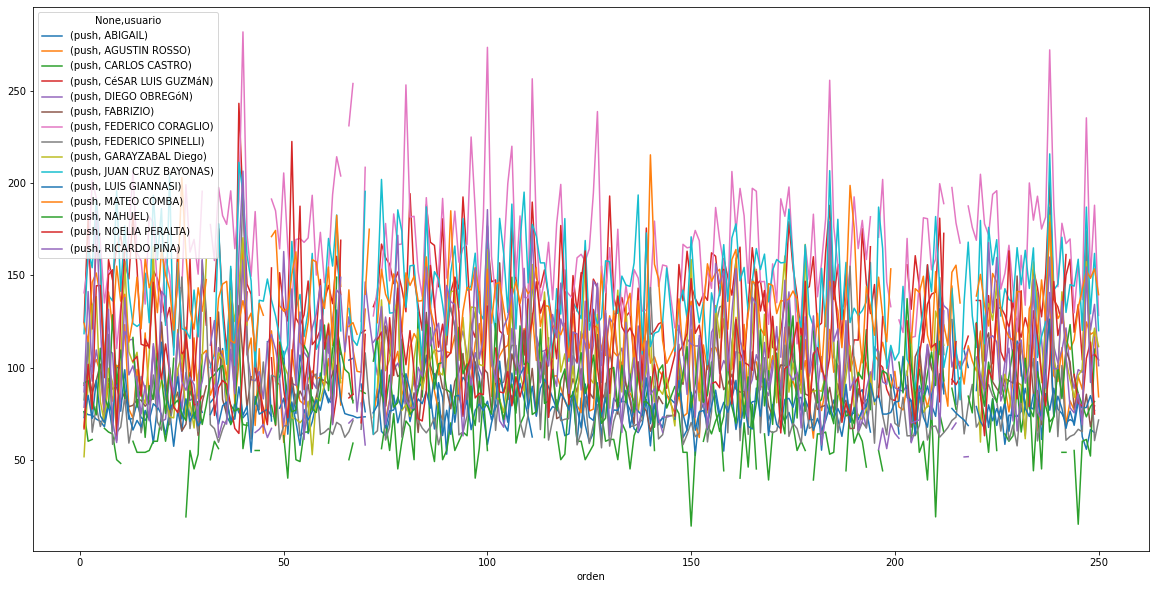

In [22]:
df_filtrado['orden'] = df_filtrado['orden'].astype(int)  #Lo vuelvo a int para poder ordenarlo

tabla = pd.pivot_table(df_filtrado, values='push', index=['orden','usuario'], aggfunc='mean').unstack()
tabla.sort_values(by='orden', ascending=False).plot(kind='line',figsize=(20,10),use_index=True,legend=True)

<AxesSubplot:xlabel='orden'>

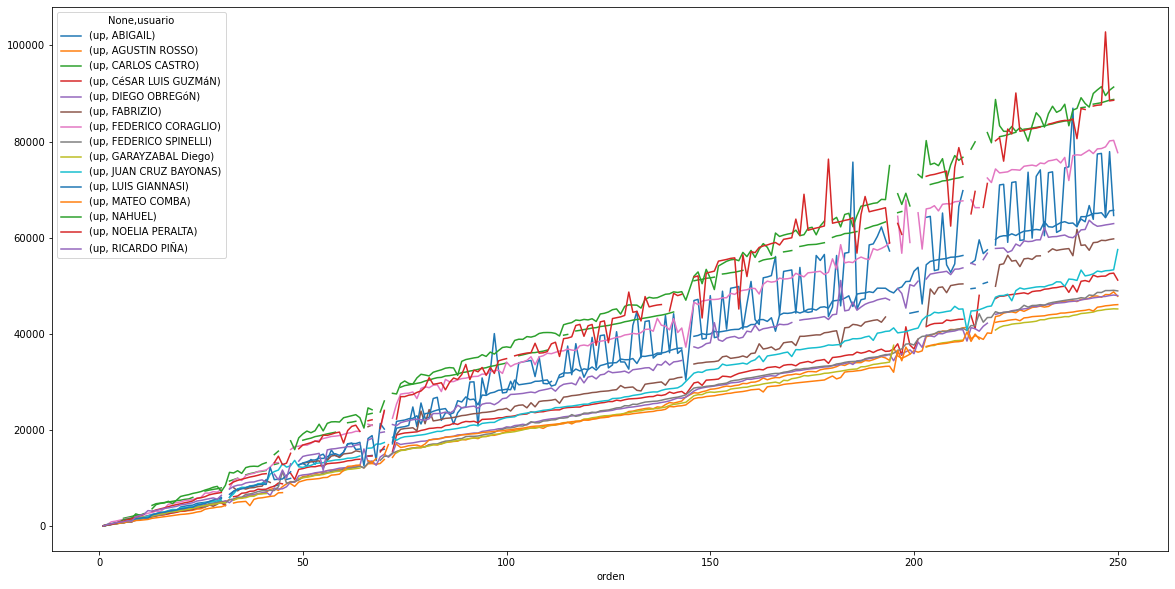

In [23]:

tabla = pd.pivot_table(df_filtrado, values='up', index=['orden','usuario'], aggfunc='mean').unstack()
tabla.sort_values(by='orden', ascending=False).plot(kind='line',figsize=(20,10),use_index=True,legend=True)

<AxesSubplot:xlabel='orden'>

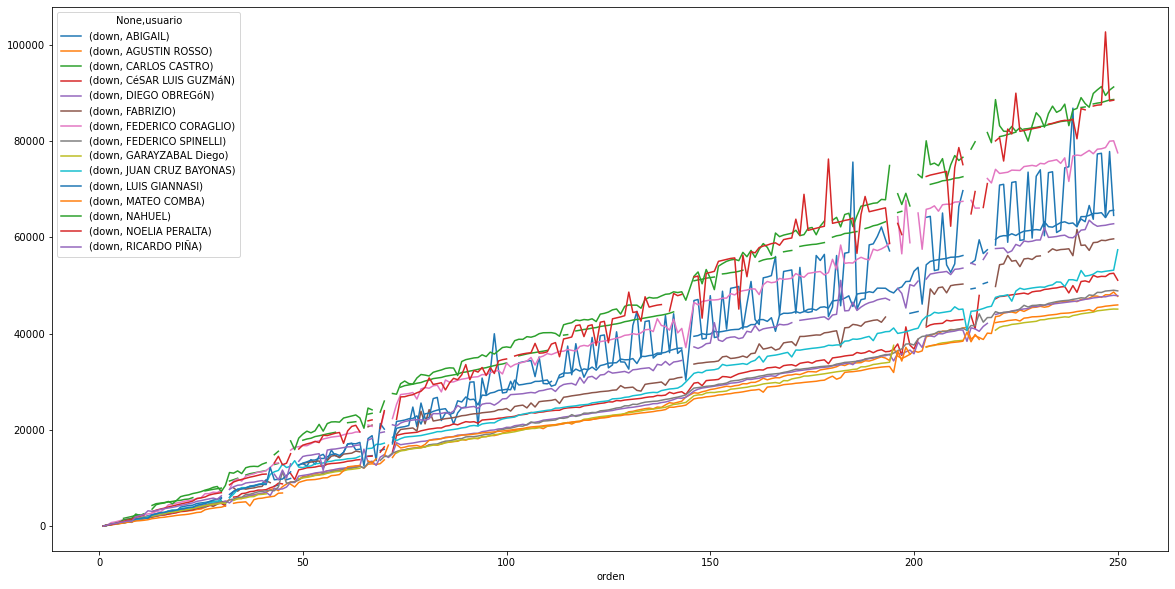

In [24]:
tabla = pd.pivot_table(df_filtrado, values='down', index=['orden','usuario'], aggfunc='mean').unstack()
tabla.sort_values(by='orden', ascending=False).plot(kind='line',figsize=(20,10),use_index=True,legend=True)

<AxesSubplot:xlabel='orden'>

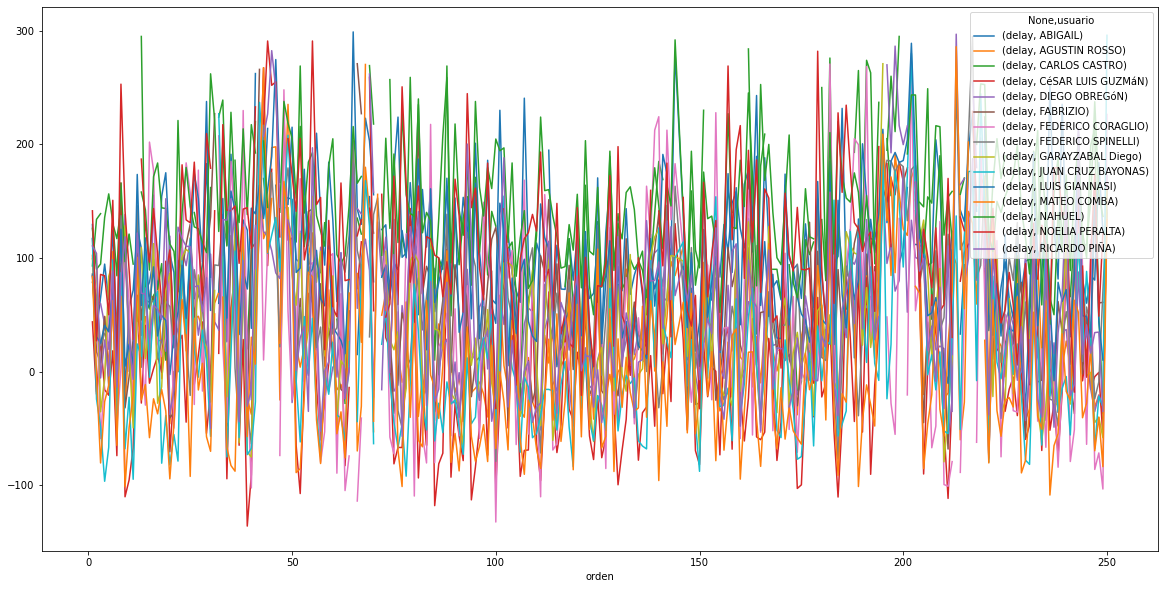

In [25]:
tabla = pd.pivot_table(df_filtrado, values='delay', index=['orden','usuario'], aggfunc='mean').unstack()
tabla.sort_values(by='orden', ascending=False).plot(kind='line',figsize=(20,10),use_index=True,legend=True)

Calculo de varianzas

In [26]:
down = pd.pivot_table(df_filtrado, values='down', index=['usuario'], aggfunc='mean').unstack()
down
np.var(down)

59984481.497134715

In [27]:
up = pd.pivot_table(df_filtrado, values='up', index=['usuario'], aggfunc='mean').unstack()
up
np.var(up)

59900695.847008005

In [28]:
push = pd.pivot_table(df_filtrado, values='push', index=['usuario'], aggfunc='mean').unstack()
push
np.var(push)

726.8292242314308

In [29]:
delay = pd.pivot_table(df_filtrado, values='delay', index=['usuario'], aggfunc='mean').unstack()
delay
np.var(delay)

1844.2216415237237

In [30]:
#Prueba de libreria funpy

In [31]:
from funpymodeling.exploratory import profiling_num

In [32]:
profiling_num(df_filtrado)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,index,5.837436e+04,3.309059e+04,0.566869,707.51,6739.55,28525.75,60977.5,84516.25,110934.45,115237.98
1,usuario_id,6.291931e+01,1.933420e+01,0.307286,1.00,1.00,64.00,68.0,72.00,74.00,76.00
2,dni,3.025794e+07,6.906038e+06,0.228239,17385722.00,23196174.00,23197417.00,33388538.0,36579315.00,39622908.00,41847454.00
3,tiempo_id,6.115299e+04,3.433231e+04,0.561417,708.51,6276.55,31517.75,62346.5,92423.25,111999.45,115704.49
4,practica,1.700069e+01,1.298859e+01,0.764004,1.00,1.00,6.00,14.0,27.00,41.00,49.00
5,tecla,6.840877e+01,1.676079e+01,0.245009,32.00,32.00,65.00,73.0,82.00,85.00,85.00
6,up,2.979862e+04,2.032832e+04,0.682190,362.00,1824.00,15302.75,27832.0,41696.00,66835.60,90438.62
7,down,2.969829e+04,2.032900e+04,0.684517,255.00,1722.55,15203.50,27725.5,41600.25,66728.80,90318.76
8,anterior,6.640338e+01,1.853920e+01,0.279191,32.00,32.00,65.00,71.0,82.00,85.00,85.00
9,modo,1.000000e+00,0.000000e+00,0.000000,1.00,1.00,1.00,1.0,1.00,1.00,1.00


In [33]:
asd = pd.pivot_table(df_filtrado, values='delay', index=['usuario','orden'], aggfunc='mean').unstack().reset_index()
asd

usuario       delay                                      \
orden                              1           2           3           4   
0                ABIGAIL  129.428571   37.428571   65.000000   94.571429   
1          AGUSTIN ROSSO  102.265306  -17.620000    4.372549   48.632653   
2          CARLOS CASTRO   93.000000  134.000000  139.000000         NaN   
3      CéSAR LUIS GUZMáN   43.714286  -20.000000   27.500000  -16.083333   
4          DIEGO OBREGóN  117.236842   58.833333   59.868421   41.605263   
5               FABRIZIO   85.875000   17.428571    7.625000   48.250000   
6      FEDERICO CORAGLIO   84.100000   70.888889  -59.000000   -6.800000   
7      FEDERICO SPINELLI   78.590909   66.380952   22.857143   33.409091   
8       GARAYZABAL Diego   99.125000   94.958333  -35.458333   -5.956522   
9      JUAN CRUZ BAYONAS  116.875000  -24.250000  -48.625000  -96.625000   
10         LUIS GIANNASI   84.731707   30.725000   24.902439   40.609756   
11           MATEO COMBA   83.750000   -3.000000  -80.500000  -26.500000   
12                NAHUEL  126.023810   90.071429   94.697674  135.642857   
13        NOELIA PERALTA  141.500000   27.000000   85.500000   84.333333   
14          RICARDO PIÑA  110.500000  104.000000   -5.700000   27.800000   

                                                                               \
orden           5           6           7           8           9          10   
0       63.285714  124.428571   31.666667  154.666667  -19.714286   56.571429   
1        1.901961  105.720000   26.900000   87.717949  -30.897959   26.380000   
2             NaN  130.000000  117.000000  143.000000   96.000000  120.000000   
3      -20.857143   18.285714  -74.071429  166.000000 -110.285714  -95.500000   
4       19.605263   91.368421    0.783784   51.216216  138.263158    0.131579   
5      -13.125000   72.375000  -15.375000   95.166667  -32.000000   -4.375000   
6       52.111111   90.700000  -48.200000    2.200000  104.400000   62.700000   
7       37.909091   53.863636  -33.181818  137.222222  100.850000   32.789474   
8       83.869565   95.875000   -2.000000   70.000000  128.454545   19.173913   
9      -66.750000   98.375000  -54.125000   87.000000  -68.000000  -22.625000   
10      34.975000   74.365854   28.731707  125.212121    4.707317   24.052632   
11     -12.000000   62.500000  -65.000000   66.250000 -101.500000  -49.250000   
12     156.391304  131.720930   84.309524  165.972973   96.744186  121.050000   
13      50.000000  150.750000   -8.750000  253.000000  141.500000   89.750000   
14      -3.900000   88.600000  -13.800000   82.000000  118.700000   28.111111   

                                                                              \
orden         11          12          13          14          15          16   
0      71.571429  125.400000  108.571429   70.571429   78.571429   98.666667   
1     -30.960000   95.468085   35.100000   48.354167    6.102041   53.391304   
2            NaN         NaN  295.000000   65.000000   55.000000   67.000000   
3     -67.642857   67.142857  -27.769231   40.642857  -10.285714    2.538462   
4      16.783784  118.600000   31.810811   73.578947   12.675676  155.250000   
5      28.625000  103.875000   45.375000   87.857143   66.000000   65.500000   
6     -36.625000   43.111111   23.888889  -29.600000  202.000000  177.200000   
7       1.200000  146.000000    3.750000   63.000000   60.950000   61.789474   
8     -49.625000   52.833333  109.173913   11.521739   39.416667  112.625000   
9     -94.857143   24.285714   13.250000  104.285714   -5.000000   60.125000   
10      6.210526  173.514286   58.075000  117.631579   56.800000   92.150000   
11    -21.250000  100.500000  -25.000000  -11.500000  -58.250000  -24.000000   
12     94.609756         NaN  158.000000  142.348837   89.348837  171.512195   
13     28.500000         NaN  187.000000  127.250000   96.250000  143.500000   
14     -6.900000  122.000000   68.900000   68.100000   29.111111  

In [34]:
asd.std().sort_values(ascending=False)[200:250] #Variables con mayor desviacion estandar

       orden
delay  49       49.475293
       203      49.308016
       48       49.298043
       231      49.282535
       244      49.278705
       133      49.254218
       167      49.214240
       2        49.160589
       143      48.943510
       126      48.839820
       14       48.801824
       123      48.746897
       42       48.157739
       245      47.759175
       21       47.684755
       177      47.115427
       152      46.454863
       129      46.291016
       159      45.979099
       65       45.820301
       226      45.701314
       131      45.623665
       136      45.544102
       104      45.193005
       241      45.098342
       12       43.944790
       73       43.392537
       147      42.949642
       153      42.767921
       116      41.560601
       216      41.192980
       170      40.739568
       200      40.249278
       105      40.010974
       155      37.892569
       195      35.980720
       187      35.763086
       120      34.685343

<AxesSubplot:>

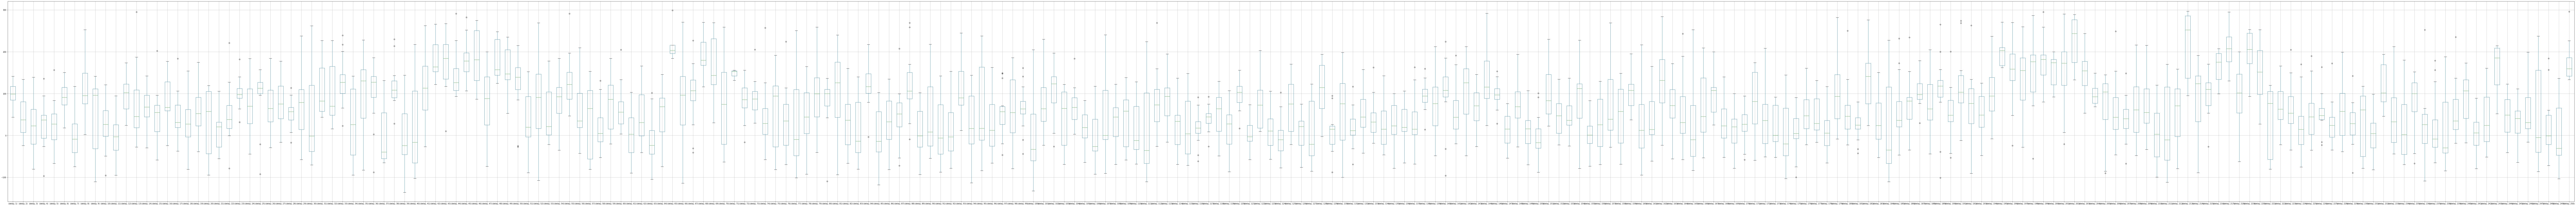

In [35]:
asd.boxplot(figsize=(250,20)) #Outliers

In [36]:
profiling_num(asd).sort_values('variation_coef',ascending=False)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
36,"(delay, 37)",0.938671,70.294495,74.887231,-64.618846,-63.401923,-55.187500,-39.725490,54.142857,112.848837,127.500000
84,"(delay, 85)",0.978748,66.135049,67.571076,-112.772540,-91.576984,-39.104167,-14.000000,56.760163,93.716667,100.743333
60,"(delay, 61)",2.230650,53.320097,23.903387,-85.480000,-69.400000,-41.020833,3.375000,42.309524,73.985714,97.159048
247,"(delay, 249)",3.834602,78.798584,20.549350,-100.687222,-89.658333,-47.182540,-30.750000,65.573864,126.954762,134.648095
38,"(delay, 39)",4.821756,83.436894,17.304253,-127.271667,-92.025000,-45.647727,-23.959184,52.070513,140.025000,143.405000
...,...,...,...,...,...,...,...,...,...,...,...
10,"(delay, 11)",-4.311393,51.591403,-11.966295,-91.319286,-77.167857,-35.208750,-2.850000,25.570946,79.634843,91.614774
105,"(delay, 106)",-2.864062,64.741917,-22.604929,-89.324615,-77.392308,-36.829167,-26.375000,38.706349,104.925610,115.053415
99,"(delay, 100)",-3.409297,95.592172,-28.038675,-128.080000,-110.400000,-60.187500,-32.958333,51.040650,151.007692,193.955385
6,"(delay, 7)",-1.674104,53.372229,-31.881065,-72.801429,-67.721429,-40.690909,-8.750000,27.815854,94.116667,112.423333


In [37]:
profiling_num(df_filtrado).sort_values('variation_coef',ascending=False)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
11,delay,5.686126e+01,8.057705e+01,1.417082,-95.00,-57.00,0.00,48.0,108.00,208.00,273.00
4,practica,1.700069e+01,1.298859e+01,0.764004,1.00,1.00,6.00,14.0,27.00,41.00,49.00
7,down,2.969829e+04,2.032900e+04,0.684517,255.00,1722.55,15203.50,27725.5,41600.25,66728.80,90318.76
6,up,2.979862e+04,2.032832e+04,0.682190,362.00,1824.00,15302.75,27832.0,41696.00,66835.60,90438.62
0,index,5.837436e+04,3.309059e+04,0.566869,707.51,6739.55,28525.75,60977.5,84516.25,110934.45,115237.98
3,tiempo_id,6.115299e+04,3.433231e+04,0.561417,708.51,6276.55,31517.75,62346.5,92423.25,111999.45,115704.49
10,push,1.003288e+02,3.310695e+01,0.329985,48.00,60.00,76.00,95.0,119.00,163.00,201.00
1,usuario_id,6.291931e+01,1.933420e+01,0.307286,1.00,1.00,64.00,68.0,72.00,74.00,76.00
8,anterior,6.640338e+01,1.853920e+01,0.279191,32.00,32.00,65.00,71.0,82.00,85.00,85.00
5,tecla,6.840877e+01,1.676079e+01,0.245009,32.00,32.00,65.00,73.0,82.00,85.00,85.00


In [38]:
df_filtrado.describe()

,index,usuario_id,dni,tiempo_id,practica,tecla,up,down,anterior,modo,push,delay,orden
count,59552.000000,59552.000000,5.955200e+04,59552.000000,59552.000000,59552.000000,59552.000000,59552.000000,59552.000000,59552.0,59552.000000,59552.000000,59552.000000
mean,58374.359652,62.919314,3.025794e+07,61152.993821,17.000688,68.408769,29798.619240,29698.290452,66.403379,1.0,100.328788,56.861264,124.847192
std,33090.586465,19.334195,6.906038e+06,34332.311966,12.988594,16.760794,20328.321035,20328.996932,18.539200,0.0,33.106946,80.577053,71.864236
min,0.000000,1.000000,1.738572e+07,1.000000,1.000000,32.000000,15.000000,0.000000,0.000000,1.0,2.000000,-184.000000,1.000000
25%,28525.750000,64.000000,2.319742e+07,31517.750000,6.000000,65.000000,15302.750000,15203.500000,65.000000,1.0,76.000000,0.000000,63.000000
50%,60977.500000,68.000000,3.338854e+07,62346.500000,14.000000,73.000000,27832.000000,27725.500000,71.000000,1.0,95.000000,48.000000,125.000000
75%,84516.250000,72.000000,3.657932e+07,92423.250000,27.000000,82.000000,41696.000000,41600.250000,82.000000,1.0,119.000000,108.000000,183.000000
max,116668.000000,77.000000,4.184745e+07,116669.000000,51.000000,86.000000,159172.000000,159103.000000,86.000000,1.0,299.000000,299.000000,250.000000


In [39]:
#Falta, agregar columna con cantidad de cambios de mano por practica y tratamiento de outliers. eliminarlos o cambiarlos por la media_

In [40]:
df_filtrado.info()   #Despues de sacar los outliers limitando el push y delay, quedan 29651 de los 36644 originales

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59552 entries, 0 to 71532
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       59552 non-null  int64  
 1   usuario_id  59552 non-null  int64  
 2   usuario     59552 non-null  object 
 3   dni         59552 non-null  int64  
 4   tiempo_id   59552 non-null  int64  
 5   practica    59552 non-null  int64  
 6   tecla       59552 non-null  int64  
 7   up          59552 non-null  int64  
 8   down        59552 non-null  int64  
 9   anterior    59552 non-null  int64  
 10  modo        59552 non-null  int64  
 11  real        59552 non-null  object 
 12  push        59552 non-null  int64  
 13  delay       59552 non-null  float64
 14  par         59552 non-null  object 
 15  orden       59552 non-null  int32  
dtypes: float64(1), int32(1), int64(11), object(3)
memory usage: 7.5+ MB
